<a href="https://colab.research.google.com/github/bryce-natale/projects2/blob/master/Build_week/BW1_DS18_Notebook_Final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#links to kaggle CSVs 
#: https://www.kaggle.com/justinas/startup-investments?select=objects.csv - Objects CSV
#: https://www.kaggle.com/justinas/startup-investments?select=acquisitions.csv - Acquisitons CSV#

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
#importing first data set
df_acquired = pd.read_csv('432357_821159_compressed_acquisitions.csv.zip')
df_acquired.head()

In [ ]:
#dropping columns that I don't need
df_acquired.drop(df_acquired.columns.difference(['acquired_object_id','price_amount','acquired_at']), 1, inplace=True)
df_acquired.head()

In [ ]:
#renaming one column so that I can merge with another df, Kaggle said the columns correspond but have different names 
df_acquired.rename(columns={'acquired_object_id':'id'},inplace=True)
df_acquired.head()

In [ ]:
#importing second df
from google.colab import files
uploaded = files.upload()

In [ ]:
df_objects = pd.read_csv('432357_821159_compressed_objects.csv (1).zip')
df_objects.head()

In [ ]:
#dropping columns that I don't need 
df_objects.drop(df_objects.columns.difference(['id','founded_at','first_funding_at']), 1, inplace=True)
df_objects.head()

In [ ]:
#merging my two dataframes 
final = pd.merge(df_objects, df_acquired, on='id', how='inner')
final.head()

In [ ]:
#looking at some of my largest datasets
final.nlargest(20,'price_amount')

In [104]:
#changing my columns to date-time format
final['founded_at'] = pd.to_datetime(final['founded_at'], infer_datetime_format=True)
final['acquired_at'] = pd.to_datetime(final['acquired_at'], infer_datetime_format=True)

In [ ]:
#calculating the difference in years between founded in acquired and then adding a new column
final['years_since'] = (final['acquired_at'] - final['founded_at']).dt.days / 365
final.head(50)

In [ ]:
#looking at some null value vales
final['years_since'].isnull().value_counts()

In [ ]:
final['years_since'].median()

In [ ]:
final.nlargest(50,'years_since')

In [109]:
# I wanted to remove some outliars
condition_less = final['years_since'] <= 30
condition_more = final['years_since'] >= 0

In [ ]:

final[condition_less][condition_more].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



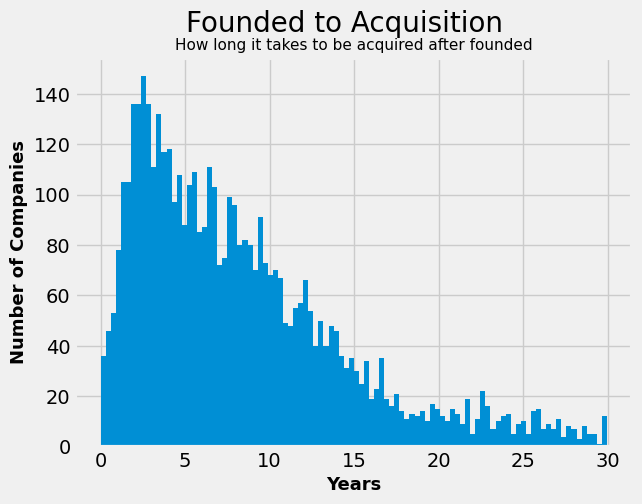

In [219]:
plt.style.use('fivethirtyeight') 

final[condition_less][condition_more].hist(column='years_since',bins=100,);
plt.suptitle('Founded to Acquisition', fontsize=20,ha='center');
plt.title('How long it takes to be acquired after founded',fontsize=11,ha='center');
plt.xlabel('Years',fontsize=13, fontweight='bold');
plt.ylabel('Number of Companies',fontsize=13, fontweight='bold');

In [163]:
less_than_five = final.loc[(final['years_since']<=5) & (final['years_since']>=0)]

less_than_five['price_amount'].mean()

47703146.223967426

In [164]:
five_to_ten = final.loc[(final['years_since']>5) & (final['years_since']<=10)]

five_to_ten['price_amount'].mean()

84430456.38945234

In [165]:
ten_to_fifteen = final.loc[(final['years_since']>10) & (final['years_since']<=15)]

ten_to_fifteen['price_amount'].mean()

163689618.7123947

In [186]:
fifteen_to_twenty = final.loc[(final['years_since']>15) & (final['years_since']<=20)]

fifteen_to_twenty['price_amount'].mean()

239327786.37770897

In [187]:
twenty_to_twentyfive = final.loc[(final['years_since']>20) & (final['years_since']<=25)]

twenty_to_twentyfive['price_amount'].mean()

423721538.46153843

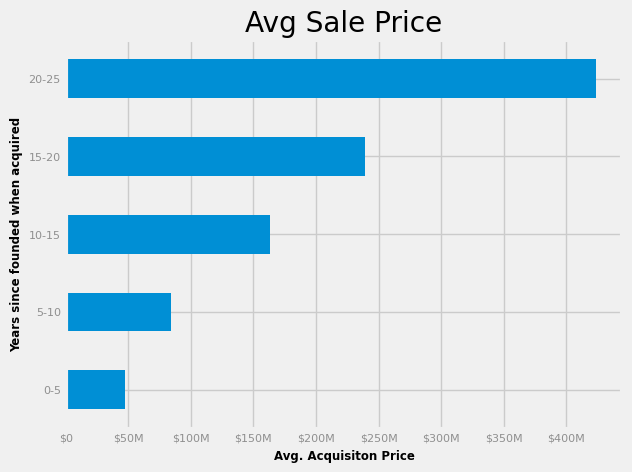

In [214]:
plt.style.use('fivethirtyeight') 
fig, ax = plt.subplots()


ax.set_xlabel("Avg. Acquisiton Price", fontsize=8.5, fontweight='bold')
ax.set_ylabel("Years since founded when acquired", fontsize=8.5, fontweight='bold')
ax.set_xticklabels(['$0','$50M', '$100M','$150M', '$200M', '$250M','$300M','$350M','$400M'], fontsize=8, color='#8f8f8f') 
plt.title('Avg Sale Price')


avg_price_data = pd.Series([47.4,84.4,163.6,239.3,423.7])

avg_price_data.plot.barh();
ax.set_yticklabels(['0-5','5-10','10-15','15-20','20-25'],fontsize=8, color='#8f8f8f');